# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# bagging classifier
from sklearn.ensemble import BaggingClassifier

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import xgboost
from xgboost import XGBClassifier


In [4]:
# disable warnings from appearing to keep notebook clean
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [5]:
df = pd.read_csv('BankChurners.csv', sep = ',', index_col = 0)

## Data Overview

- Observations
- Sanity checks

In [6]:
# print the shape and the first 5 records of the dataset
shape = df.shape
print(f'The dataset has {shape[0]} rows and {shape[1]} columns')

# print information about the dataset
print(df.info())

# print a description of the dataset
df.describe(include="all")

# check for missing values
print(f"Missing Values: {df.isnull().sum()}")

# count uninque values in each column
print(f"Unique Values: {df.nunique()}")

# check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# print the column names
print(f"Columns: {df.columns}")


The dataset has 10127 rows and 20 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_R

### View the first and last 5 rows of the dataset.

In [7]:
# print the first 5 records of the dataset
top5_records = df.head()
top5_records

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Observations for the head:
High Engagement with Bank Products:

Most customers in the head have relatively high total relationship counts (e.g., 5 for 768805383 and 709106358) and a significant number of months on the book (ranging from 21 to 44).
They also show frequent transactions, with Total_Trans_Ct values exceeding 20.
Low Revolving Balances and Utilization Ratios:

Many customers exhibit low Total_Revolving_Bal (e.g., 0 for 713982108 and 709106358) and low Avg_Utilization_Ratio (e.g., 0.000 for the same clients). This suggests better credit management or under-utilized credit cards.
Predominantly Male Customers:

The majority of customers in the head are male (Gender: M for 3 out of 5 entries), potentially hinting at demographic characteristics of the dataset.

In [8]:
df.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


Observations for the tail:
Attrited Customers Have Lower Activity:

Customers with the Attrited Customer flag tend to have lower Total_Trans_Ct and moderate Total_Trans_Amt compared to the head, suggesting less engagement with the bank’s services.
High Dependency on Credit with Moderate Income:

Customers at the tail show a mixed range of credit behaviors. Some, like 716506083 and 717406983, have zero Total_Revolving_Bal but fully utilize their credit limits (Avg_Open_To_Buy equal to Credit_Limit).
More Diverse Income and Card Categories:

The tail contains customers across broader income categories, including $40K - $60K and Less than $40K. Additionally, the tail features a Silver cardholder (714337233), indicating more diverse product preferences.

### Understand the shape of the dataset.

In [9]:
df.shape

(10127, 20)

* The dataset has 10127 rows and 20 columns.

### Check the data types of the columns for the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

### Observations from the `info` summary:

1. **Missing Values in Key Demographic Fields**:
   - The columns `Education_Level` and `Marital_Status` have missing values, with `Education_Level` having 1,519 null entries (`8608 non-null`) and `Marital_Status` having 749 null entries (`9378 non-null`). These gaps may introduce bias or require imputation during analysis.

2. **Balanced Data Types with Numeric Dominance**:
   - Out of 20 columns, 14 are numeric (9 `int64` and 5 `float64`), while 6 are categorical (`object`). This distribution suggests that most features are quantifiable and suitable for statistical or machine learning modeling.

3. **Compact Dataset Memory Usage**:
   - Despite having over 10,000 entries, the dataset occupies only 1.6 MB of memory. This is efficient, likely due to the concise nature of numeric columns and the small number of unique categorical variables.

### Checking for missing values

In [11]:
# checking for null values
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* The dataset has 1519 missing values for Education level, and 749 missing values for Marital Status.

### Dropping the duplicate values

In [12]:
# checking for duplicate values
df.duplicated().sum()

0

* There are no duplicate values in the data.

#### Dropping the columns with all unique values

In [13]:
df.index.nunique()

10127

### Statistical summary of the data

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [18]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### EDA

#### Question 1: How is the total transaction amount distributed?

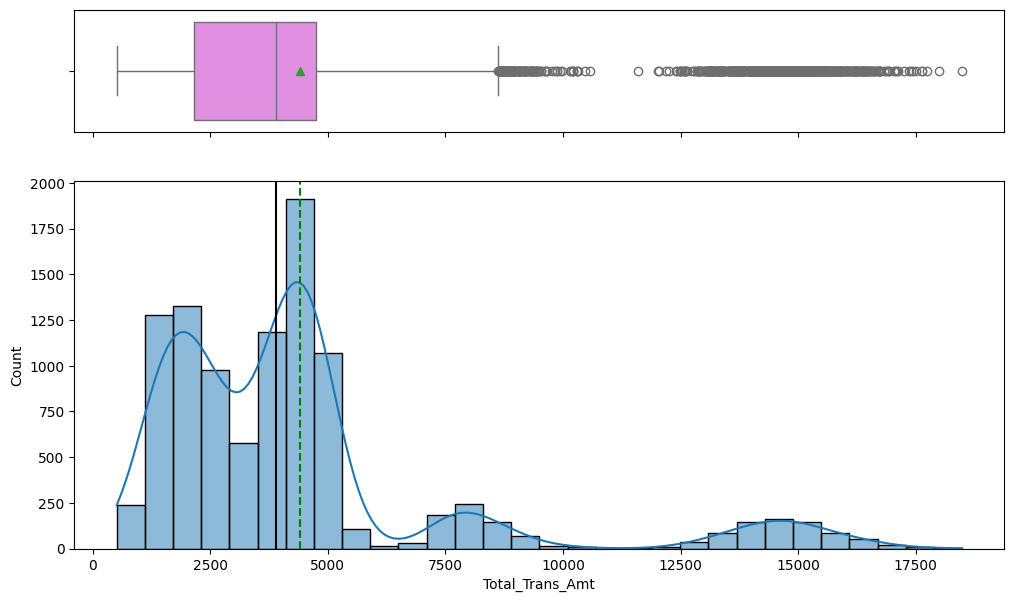

In [19]:
histogram_boxplot(df, feature='Total_Trans_Amt', kde=True, bins=30)


Observation:

The total transaction amount is right-skewed.
Most transactions are concentrated at lower amounts, with some high-value outliers.

#### Question 2: What is the distribution of the level of education of customers?

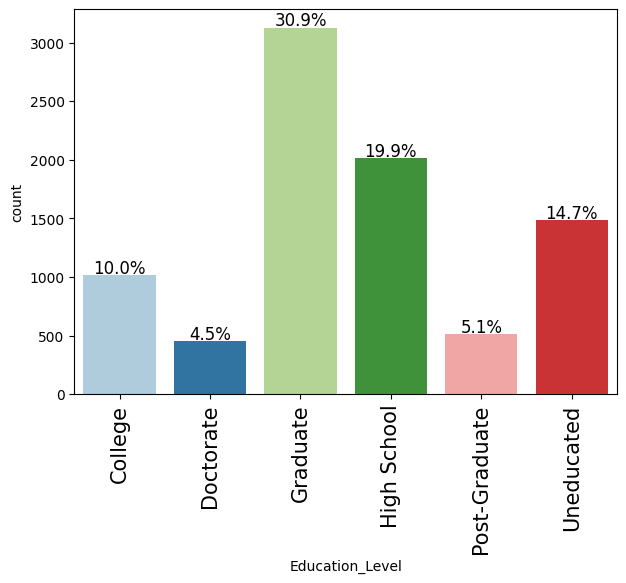

In [20]:
labeled_barplot(df, feature='Education_Level', perc=True)


Observation:

Most customers are graduates or high school-level educated.
There’s a notable proportion with unknown education levels that might need attention.

#### Question 3: What is the distribution of the level of income of customers?

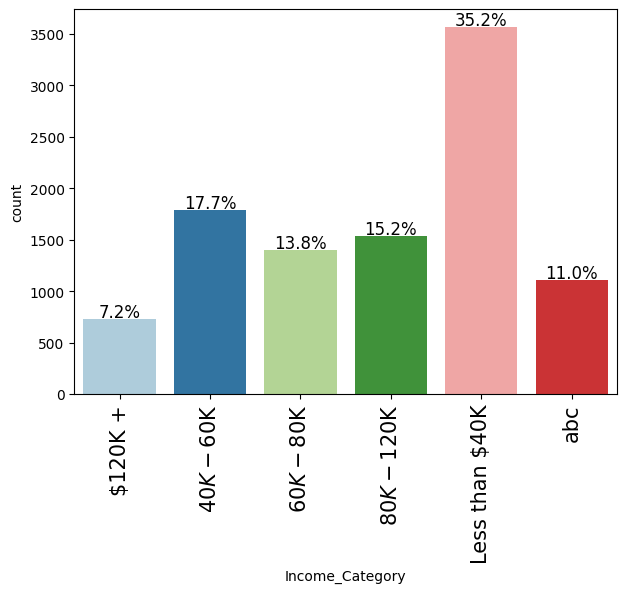

In [21]:
labeled_barplot(df, feature='Income_Category', perc=True)


Observation:

The majority of customers fall into lower income categories like "Less than 40k" and "$40K-60K". higher income categories have fewer customers.


#### Question 4: How does the change in transaction amount between Q4 and Q1 (Total_Amt_Chng_Q4_Q1) vary by the customer's account status (Attrition_Flag)?

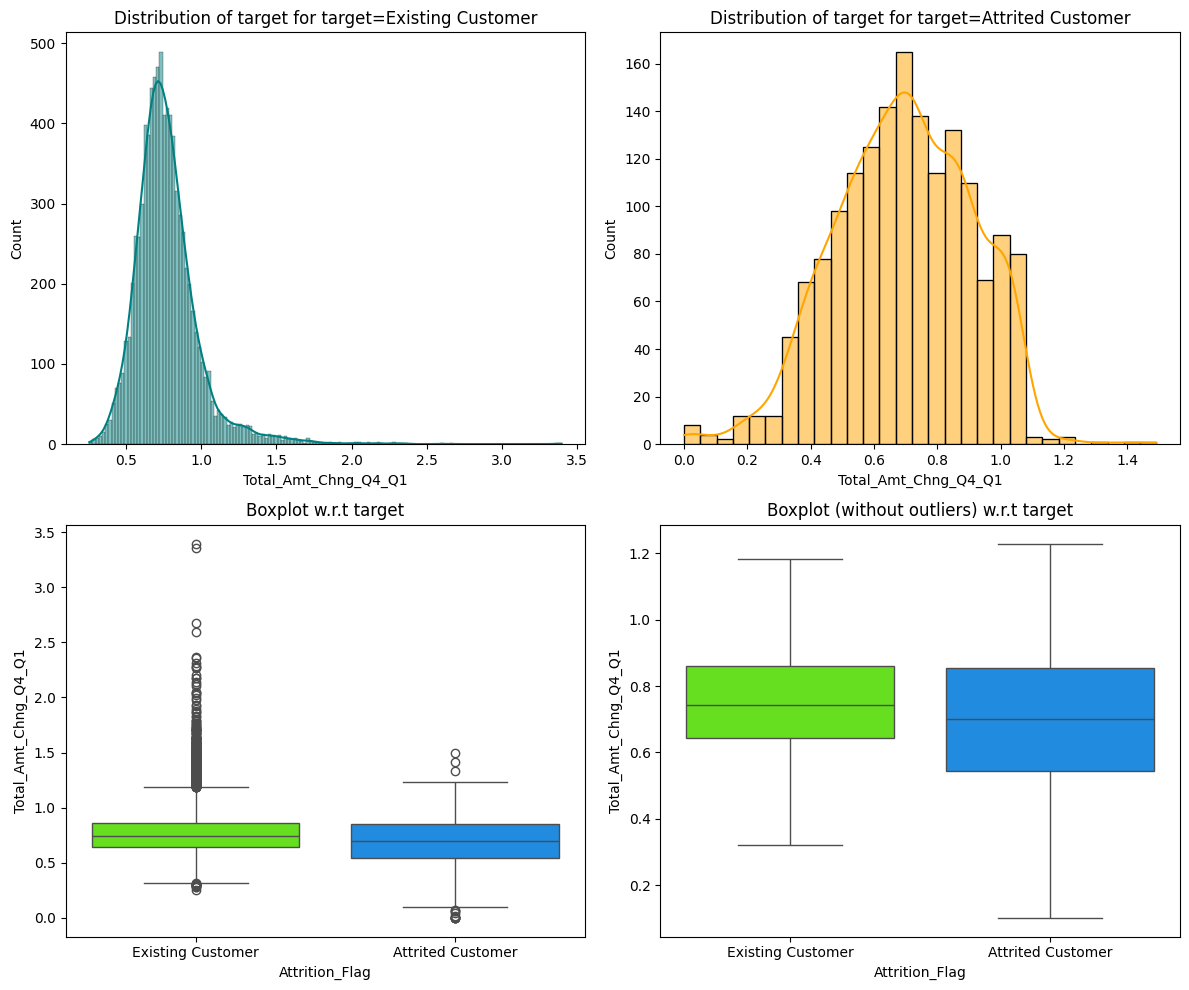

In [22]:
distribution_plot_wrt_target(df, predictor='Total_Amt_Chng_Q4_Q1', target='Attrition_Flag')


Observation:

Existing customers show a higher and more varied change in transaction amounts.
Attrited customers have smaller, more tightly clustered changes in transaction amounts.

#### Question 5: How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?

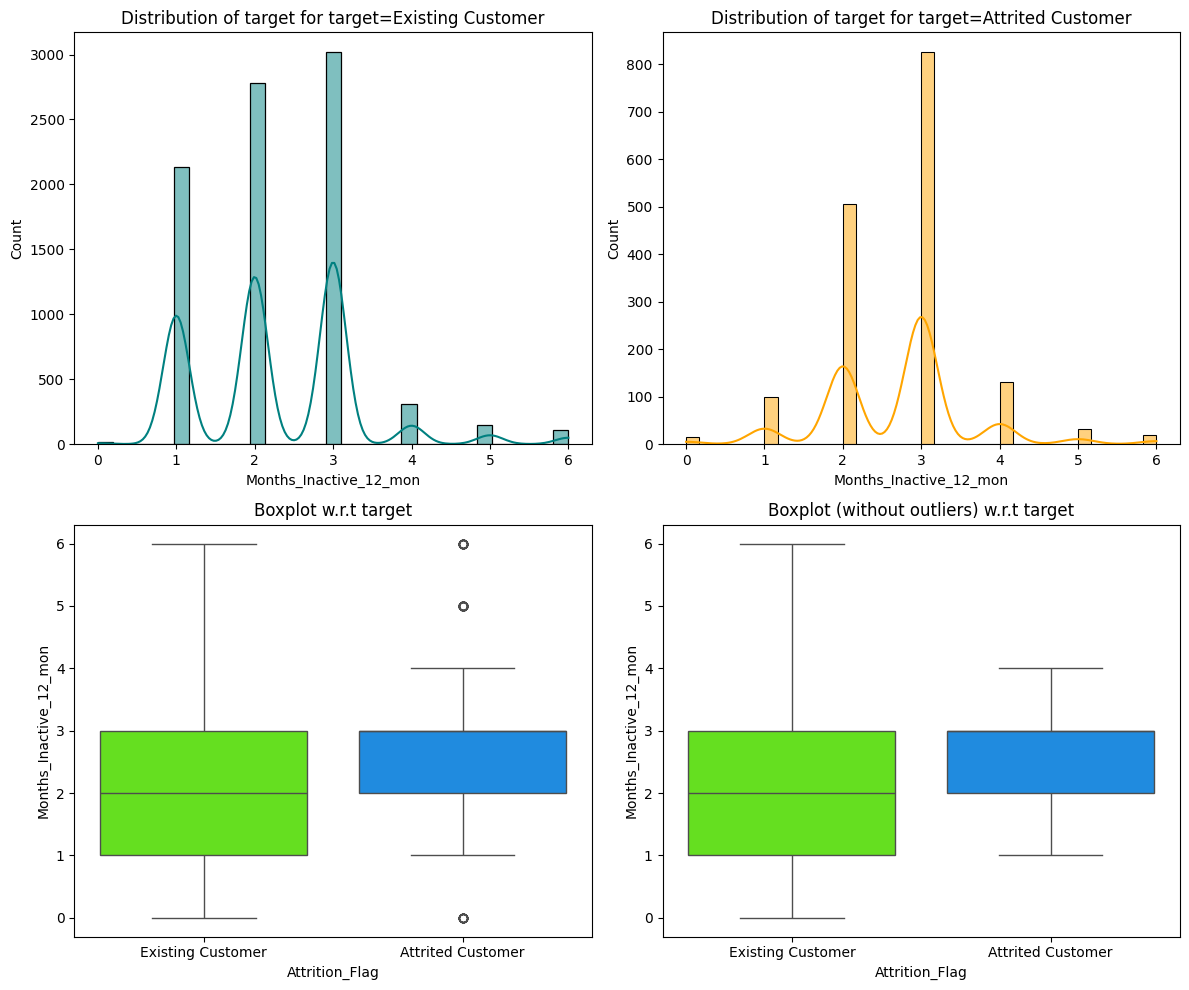

In [23]:
distribution_plot_wrt_target(df, predictor='Months_Inactive_12_mon', target='Attrition_Flag')


Observation:

Attrited customers generally have more inactive months than existing customers.
This may indicate inactivity as a predictor of attrition.

#### Question 6: What are the attributes that have a strong correlation with each other?

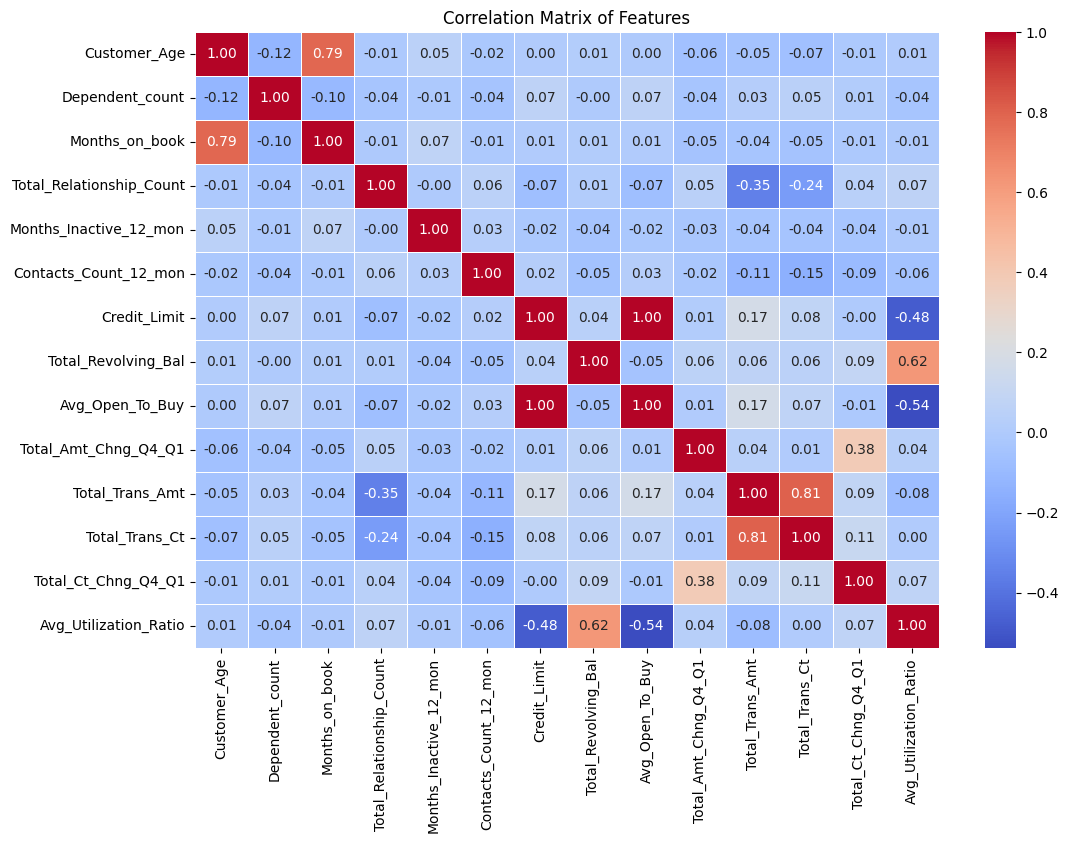

In [24]:
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


Observation:

Total_Trans_Amt and Total_Trans_Ct are strongly correlated, suggesting transaction count influences transaction amount.
Avg_Open_To_Buy and Credit_Limit are highly correlated, as both measure credit availability.
Total_Revolving_Bal and Avg_Utilization_Ratio have a strong relationship, indicating that revolving balance impacts utilization ratio.

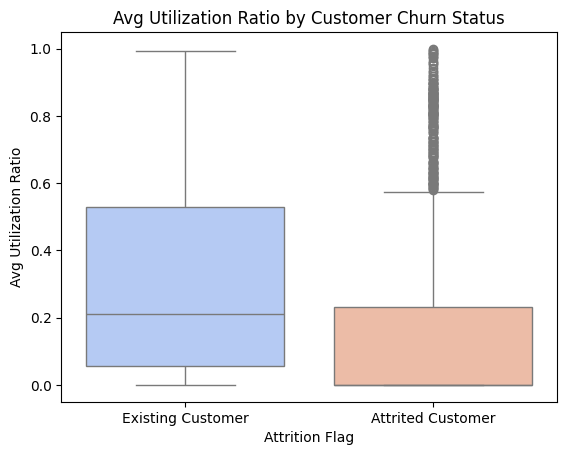

In [25]:
# Visualize the distribution of Avg_Utilization_Ratio for churned vs non-churned customers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Attrition_Flag', y='Avg_Utilization_Ratio', palette='coolwarm')
plt.title('Avg Utilization Ratio by Customer Churn Status')
plt.xlabel('Attrition Flag')
plt.ylabel('Avg Utilization Ratio')
plt.show()


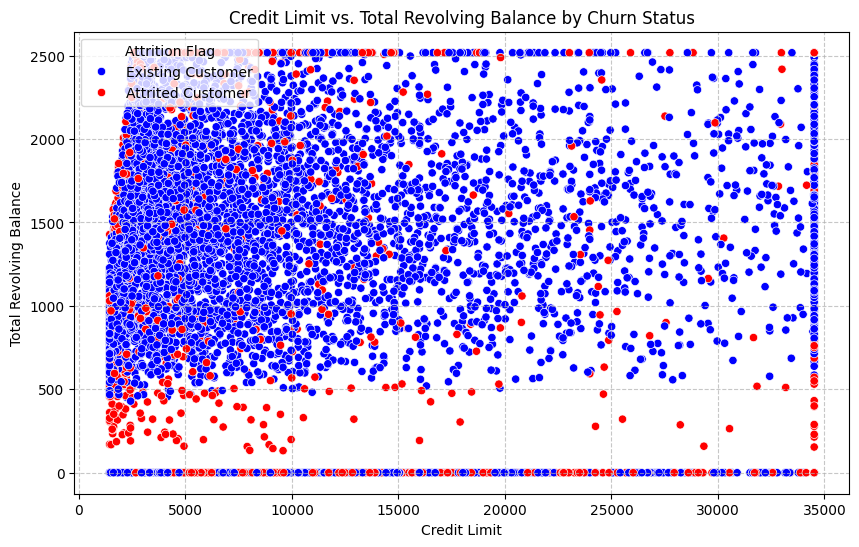

In [26]:
# Scatter plot for Credit Limit vs. Revolving Balance
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Credit_Limit', 
    y='Total_Revolving_Bal', 
    hue='Attrition_Flag', 
    palette={'Existing Customer': 'blue', 'Attrited Customer': 'red'}
)
plt.title('Credit Limit vs. Total Revolving Balance by Churn Status')
plt.xlabel('Credit Limit')
plt.ylabel('Total Revolving Balance')
plt.legend(title='Attrition Flag', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Credit Limit vs. Revolving Balance:

Churned customers may have higher revolving balances relative to their credit limit, leading to higher utilization ratios.

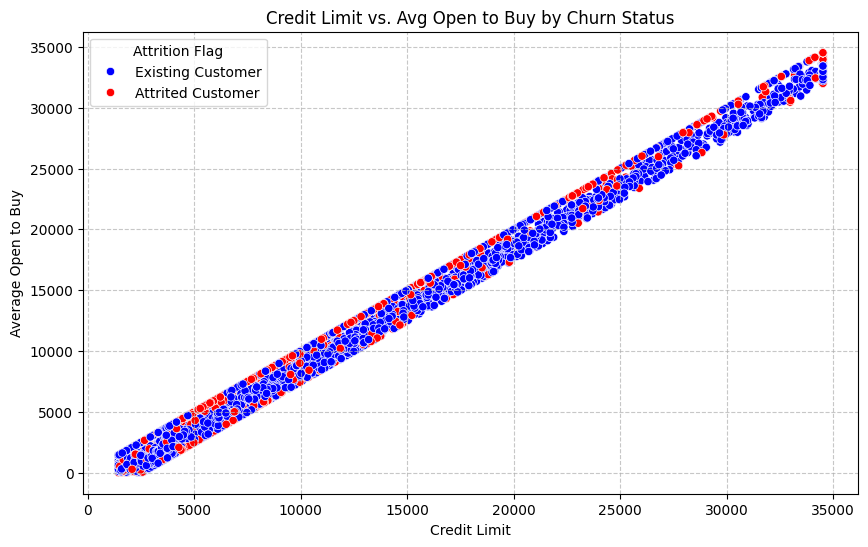

In [27]:
# Scatter plot for Credit Limit vs. Avg Open to Buy
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Credit_Limit', 
    y='Avg_Open_To_Buy', 
    hue='Attrition_Flag', 
    palette={'Existing Customer': 'blue', 'Attrited Customer': 'red'}
)
plt.title('Credit Limit vs. Avg Open to Buy by Churn Status')
plt.xlabel('Credit Limit')
plt.ylabel('Average Open to Buy')
plt.legend(title='Attrition Flag', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Avg Open to Buy vs. Credit Limit:

Churned customers often have lower Avg_Open_To_Buy compared to their credit limit, indicating they use more of their available credit.

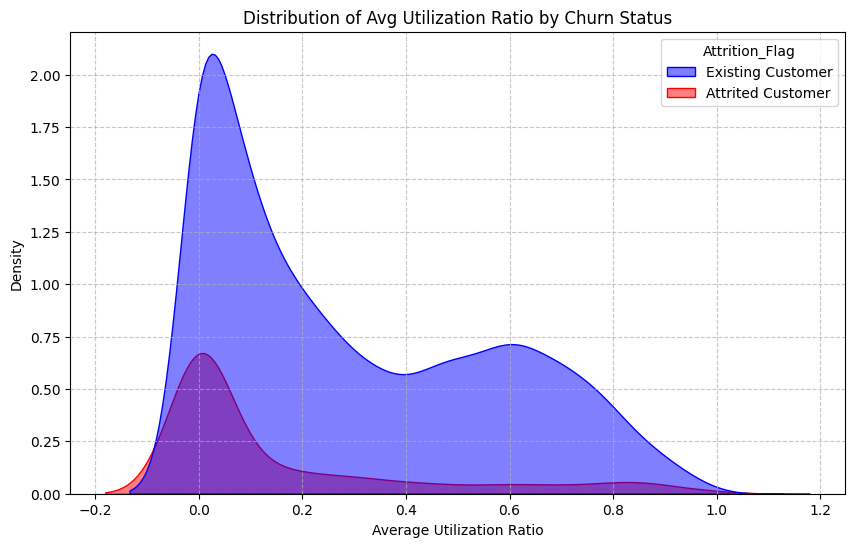

In [28]:
# Density plot for Avg Utilization Ratio
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df, 
    x='Avg_Utilization_Ratio', 
    hue='Attrition_Flag', 
    fill=True, 
    palette={'Existing Customer': 'blue', 'Attrited Customer': 'red'},
    alpha=0.5
)
plt.title('Distribution of Avg Utilization Ratio by Churn Status')
plt.xlabel('Average Utilization Ratio')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Avg Utilization Ratio Distribution:

Churned customers show a higher density in the upper utilization range, confirming that high credit usage correlates with attrition.

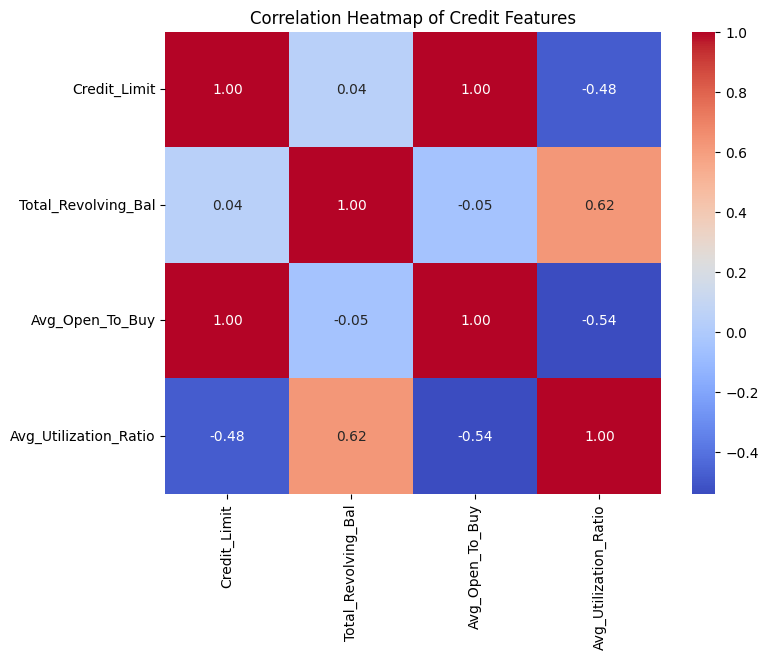

In [29]:
# Heatmap of related variables
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio']].corr()
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    cbar=True
)
plt.title('Correlation Heatmap of Credit Features')
plt.show()


Correlation Heatmap:

Strong negative correlation between Avg_Open_To_Buy and Avg_Utilization_Ratio.
Strong positive correlation between Total_Revolving_Bal and Avg_Utilization_Ratio.

#### Univariate Analysis

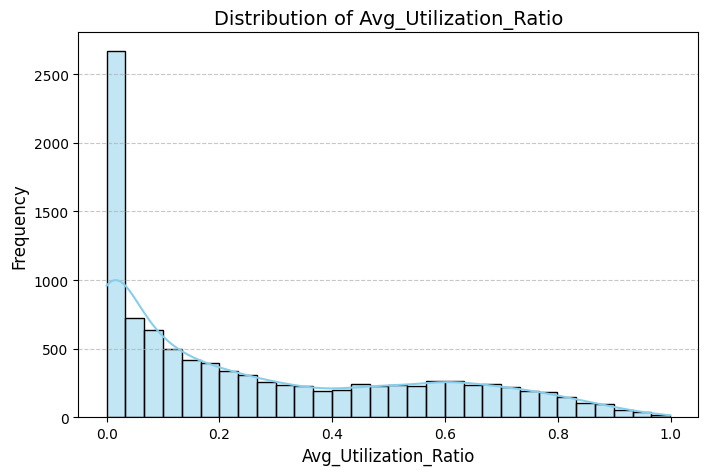

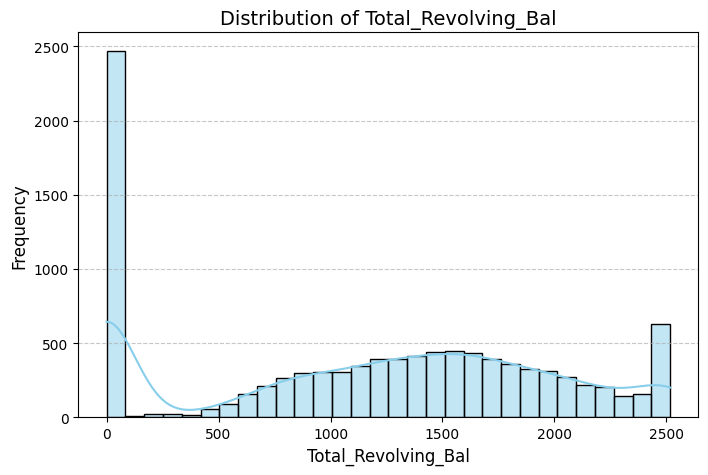

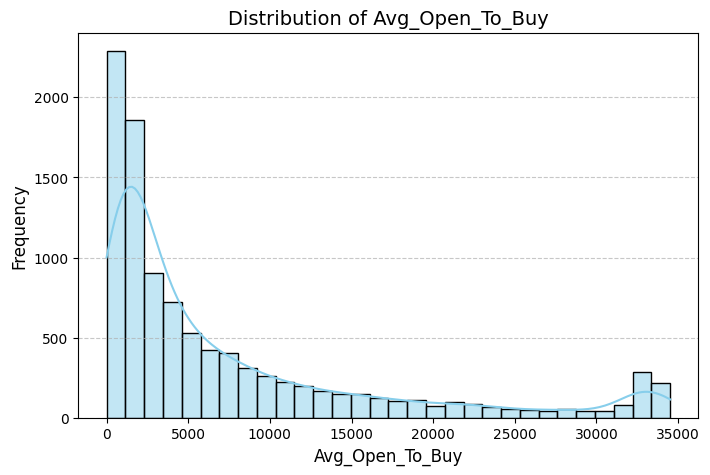

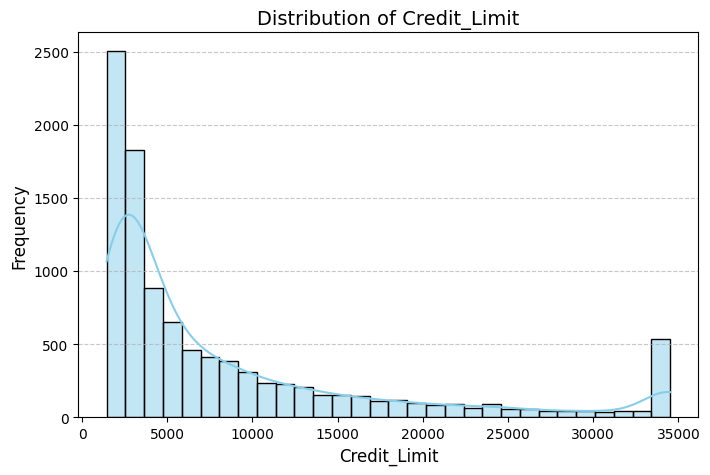

In [30]:
# Univariate analysis for continuous features
continuous_features = ['Avg_Utilization_Ratio', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Credit_Limit']

for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


- Most customers have low revolving balances, indicating minimal credit dependency, while a smaller segment shows higher balances, suggesting reliance on revolving credit.  
- Most customers have high available credit, reflecting responsible credit usage, but a small segment with low availability may indicate financial stress.  
- Most customers have lower credit limits, reflecting segmentation by risk, with a small group having high limits, representing premium customers.  

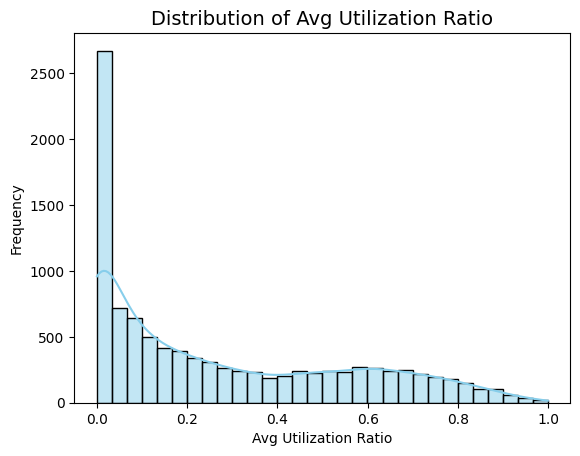

In [31]:
sns.histplot(data=df, x='Avg_Utilization_Ratio', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Avg Utilization Ratio', fontsize=14)
plt.xlabel('Avg Utilization Ratio')
plt.ylabel('Frequency')
plt.show()


- Most customers have an `Avg Utilization Ratio` close to 0, indicating minimal credit usage and likely financial stability, while a smaller segment shows higher utilization, suggesting potential financial strain or over-reliance on credit.

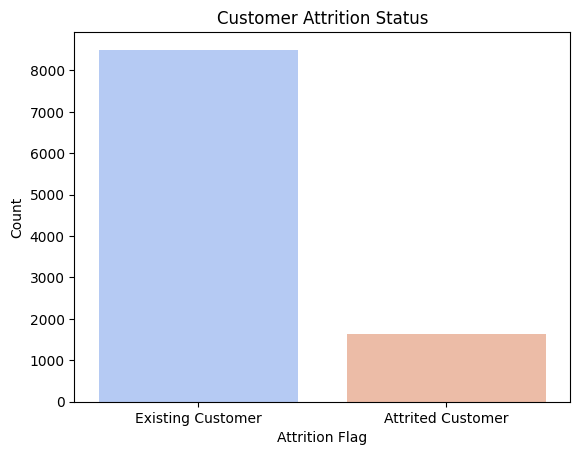

In [32]:
sns.countplot(data=df, x='Attrition_Flag', palette='coolwarm')
plt.title('Customer Attrition Status')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()


- The majority of customers (labeled as `1`) are retained, while a smaller proportion (labeled as `0`) represents churned customers, highlighting a class imbalance in the dataset.

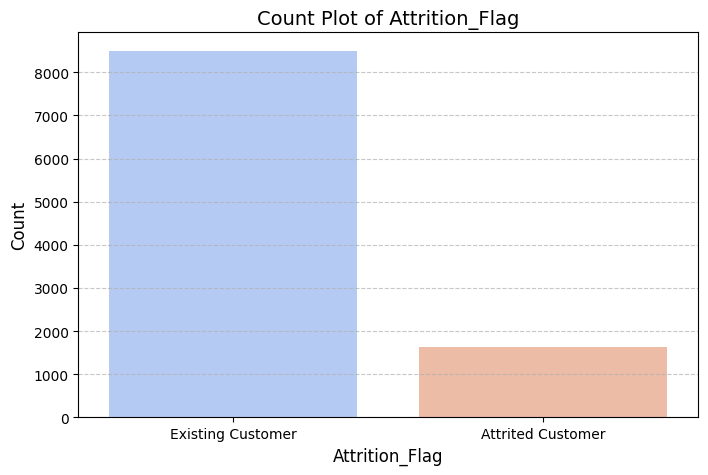

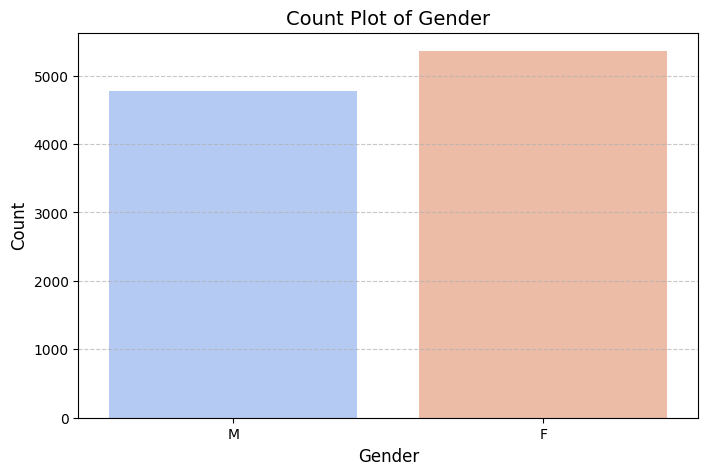

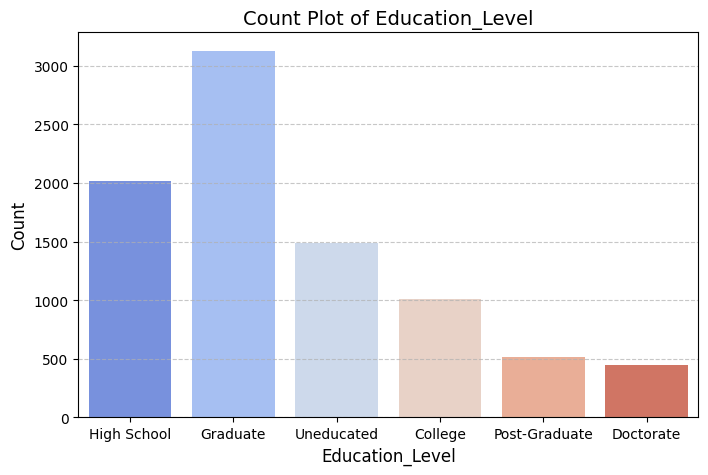

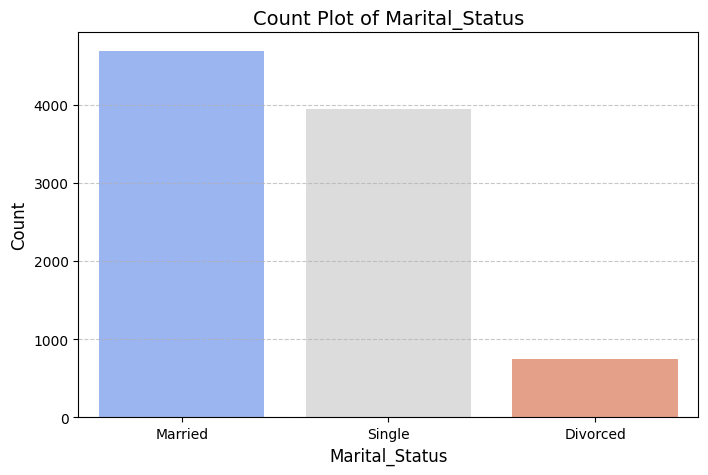

In [33]:
# Univariate analysis for categorical features
categorical_features = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, palette='coolwarm')
    plt.title(f'Count Plot of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Observations: 
- The dataset shows a class imbalance in `Attrition_Flag`, with the majority being retained customers and a smaller segment representing churned customers.  
- Gender distribution is relatively balanced, with a slight majority of female (`F`) customers over male (`M`) customers.  
- Most customers are graduates, followed by high school graduates, with fewer customers having advanced degrees like post-graduate or doctorate.  
- The majority of customers are married, followed by singles, while divorced customers form the smallest group.  
- These demographic trends provide valuable context for tailoring retention strategies and customer engagement initiatives.  

#### Bivariate Analysis

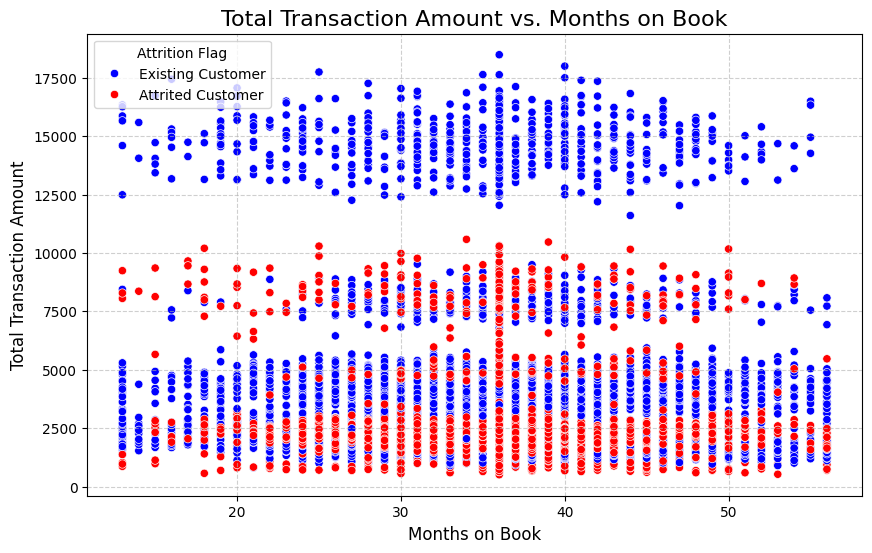

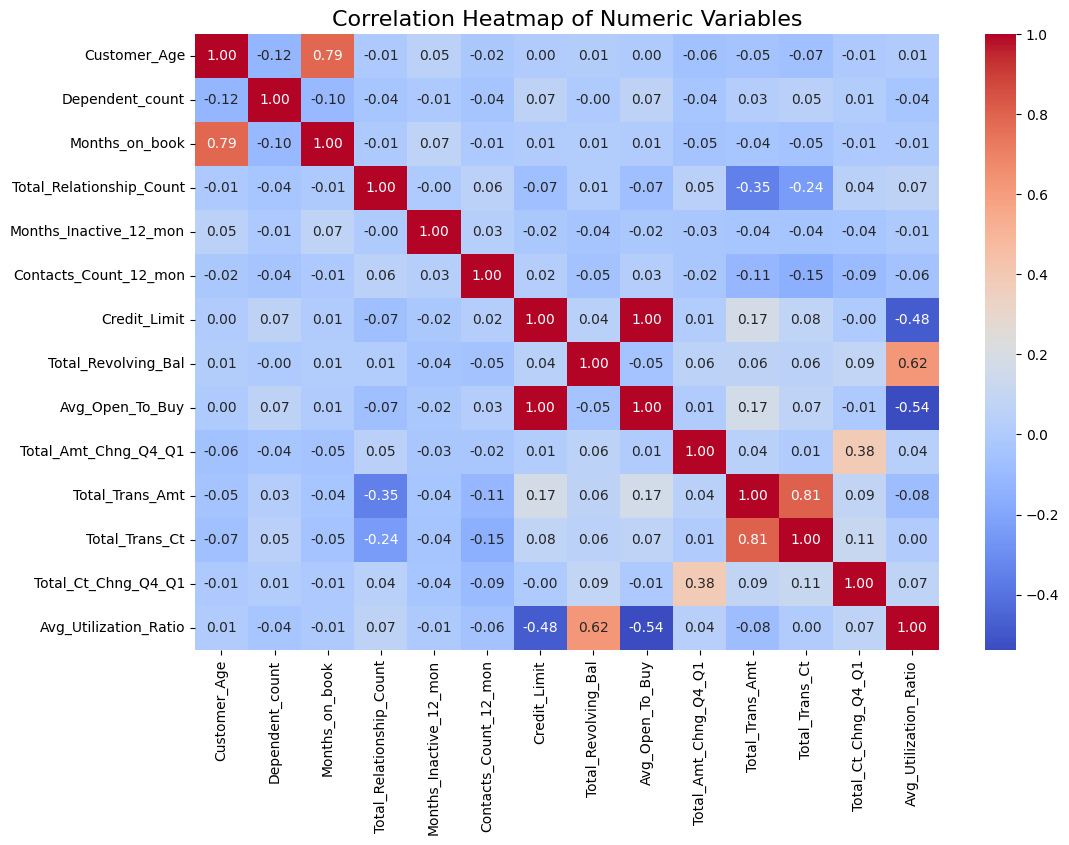

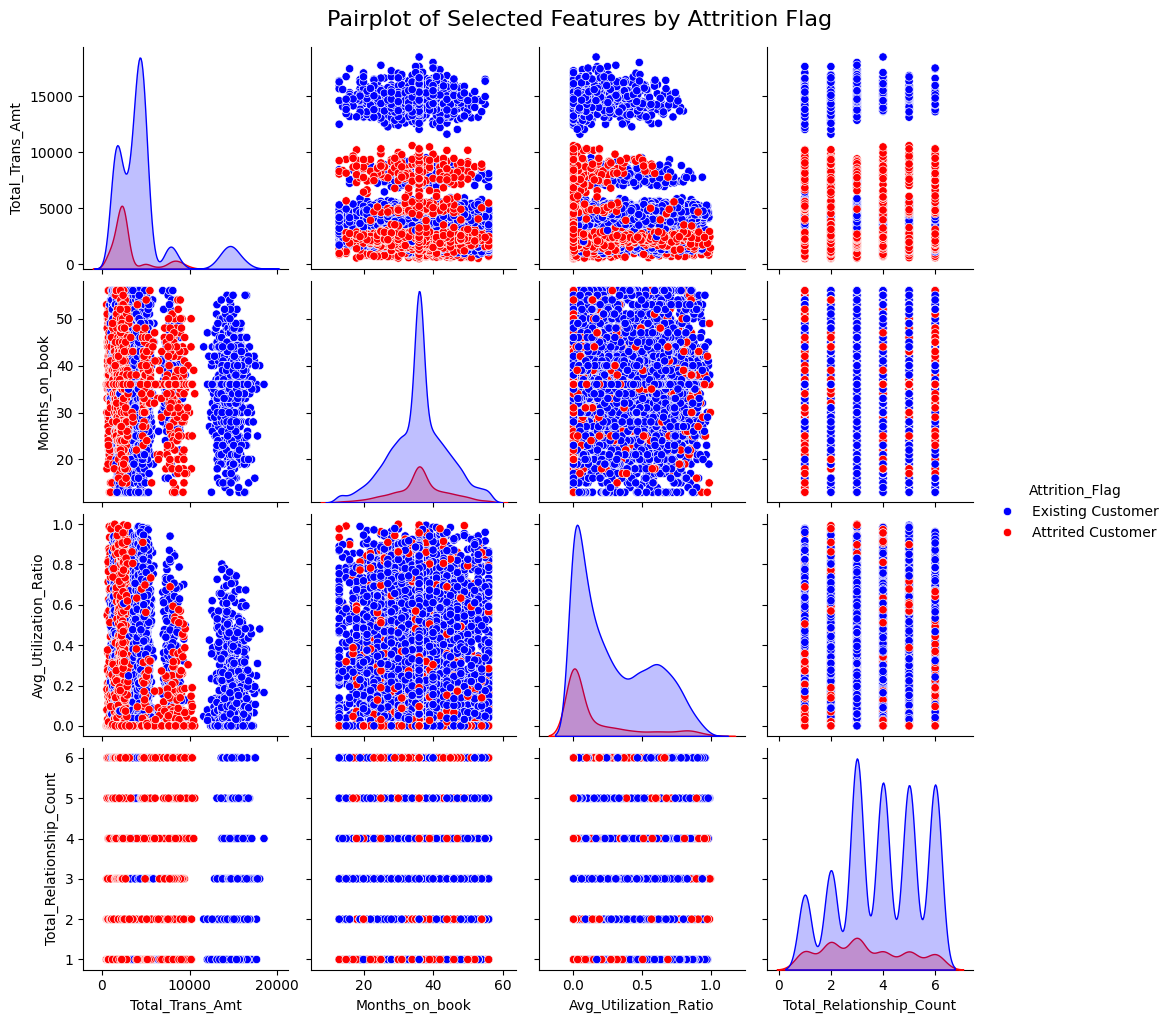

In [34]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# scatter plot: Total_Trans_Amt vs. Months_on_book colored by Attrition_Flag
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Months_on_book', 
    y='Total_Trans_Amt', 
    hue='Attrition_Flag', 
    palette={'Attrited Customer': 'red', 'Existing Customer': 'blue'}
)
plt.title('Total Transaction Amount vs. Months on Book', fontsize=16)
plt.xlabel('Months on Book', fontsize=12)
plt.ylabel('Total Transaction Amount', fontsize=12)
plt.legend(title='Attrition Flag', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Correlation heatmap for numeric variables
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Numeric Variables', fontsize=16)
plt.show()

# Pairplot for selected variables to observe patterns
selected_features = ['Total_Trans_Amt', 'Months_on_book', 'Avg_Utilization_Ratio', 'Total_Relationship_Count']
sns.pairplot(
    df[selected_features + ['Attrition_Flag']], 
    hue='Attrition_Flag', 
    diag_kind='kde', 
    palette={'Attrited Customer': 'red', 'Existing Customer': 'blue'}
)
plt.suptitle('Pairplot of Selected Features by Attrition Flag', y=1.02, fontsize=16)
plt.show()


### Bivariate Analysis: Insights

1. **Total Transaction Amount vs. Months on Book**:
   - Attrited customers generally have lower total transaction amounts compared to existing customers, especially for those with shorter relationships with the bank.
   - Customers with longer relationships (high `Months_on_book`) tend to have higher transaction amounts.

2. **Correlation Heatmap**:
   - Strong correlation observed between `Total_Trans_Amt` and `Total_Trans_Ct`, indicating that higher transaction counts contribute to higher transaction amounts.
   - Negative correlation between `Avg_Utilization_Ratio` and `Avg_Open_To_Buy` suggests that customers with high utilization are closer to reaching their credit limits.

3. **Pairplot Observations**:
   - `Avg_Utilization_Ratio` is higher for attrited customers compared to existing customers.
   - `Total_Relationship_Count` shows a clear distinction: attrited customers tend to have fewer products with the bank.

### Actionable Suggestions from EDA:
- Focus on retaining customers with high `Avg_Utilization_Ratio` by offering them higher credit limits or personalized counseling.
- Target customers with fewer products (`Total_Relationship_Count`) with bundled offers to increase engagement.


## Data Pre-processing

In [35]:
"""
Data Preprocessing:

Loads the dataset and drops irrelevant columns.
Identifies and displays missing values.
Lists categorical columns for a clearer understanding of data structure.
"""

# Data Preprocessing
# 1. Check column names
print("Column Names in Dataset:")
print(df.columns)

# 2. Drop columns not relevant for analysis (if they exist)
if 'CLIENTNUM' in df.columns:
    df.drop(columns=['CLIENTNUM'], inplace=True)
else:
    print("Column 'CLIENTNUM' not found, skipping drop.")

# 3. Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# 4. print missing values overview
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)
print("Missing Values Overview:")
print(missing_data)

# 5. Handle missing values and clean data
df.fillna(df.mean(), inplace=True)

# 6. Encode the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Attrition_Flag'] = encoder.fit_transform(df['Attrition_Flag'])

# 7. Handle categorical features
# Display categorical columns and their unique values
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns and Unique Values:")
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")


Column Names in Dataset:
Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
Column 'CLIENTNUM' not found, skipping drop.
Missing Values Overview:
                          Missing Values  Percentage
Education_Level                     1519   14.999506
Marital_Status                       749    7.396070
Attrition_Flag                         0    0.000000
Contacts_Count_12_mon                  0    0.000000
Total_Ct_Chng_Q4_Q1                    0    0.000000
Total_Trans_Ct                         0    0.000000
Total_Trans_Amt                        0    0.000000
Total_Amt_Chng_Q

## Missing value imputation




In [36]:
"""
Handles missing values for specific columns (Education_Level, Marital_Status) using the mode.
Verifies that missing values have been addressed.
"""

# Missing Values Imputation
# Impute missing values for categorical columns with mode
for col in ['Education_Level', 'Marital_Status']:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Check if all missing values are imputed
print("\nPost-Imputation Missing Values Check:")
print(df.isnull().sum())




Post-Imputation Missing Values Check:
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [37]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

In [38]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('BankChurners.csv')

# Preprocessing (assuming 'Attrition_Flag' is the target variable)
data['Attrition_Flag'] = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)
X = data.drop(columns=['Attrition_Flag', 'CLIENTNUM'], errors='ignore')
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables
y = data['Attrition_Flag']

# Splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Define the models
models = []  # Empty list to store all the models
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))

# Helper function for performance evaluation
def model_performance_classification_sklearn(model, predictors, target):
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)  # Accuracy
    recall = recall_score(target, pred, zero_division=0)  # Recall
    precision = precision_score(target, pred, zero_division=0)  # Precision
    f1 = f1_score(target, pred, zero_division=0)  # F1 Score
    return pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1}, index=[0])

# Train and evaluate models
print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    train_perf = model_performance_classification_sklearn(model, X_train, y_train)
    print(f"{name}:\n{train_perf}\n")

print("\nValidation Performance:\n")
for name, model in models:
    val_perf = model_performance_classification_sklearn(model, X_val, y_val)
    print(f"{name}:\n{val_perf}\n")



Training Performance:

Bagging:
   Accuracy    Recall  Precision        F1
0  0.996473  0.983319   0.994671  0.988962

Random Forest:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Decision Tree:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

AdaBoost:
   Accuracy    Recall  Precision        F1
0  0.957111  0.841089   0.886216  0.863063

Gradient Boosting:
   Accuracy    Recall  Precision        F1
0  0.975593  0.885865   0.959125  0.921041


Validation Performance:

Bagging:
   Accuracy    Recall  Precision        F1
0   0.96183  0.852459   0.904348  0.877637

Random Forest:
   Accuracy    Recall  Precision       F1
0  0.952945  0.772541    0.92176  0.84058

Decision Tree:
   Accuracy    Recall  Precision        F1
0  0.937808  0.819672   0.798403  0.808898

AdaBoost:
   Accuracy    Recall  Precision      F1
0  0.956565  0.848361   0.877119  0.8625

Gradient Boosting:
   Accuracy    Recall  Precision        F1
0   0.96512  0.856557 

#### Observations

* Overfitting in Decision Tree and Random Forest Models:

* The training performance for Random Forest and Decision Tree shows perfect scores (accuracy, recall, precision, and F1 are all 1.0). This indicates potential overfitting, as these models may be memorizing the training data instead of generalizing patterns.
* Their validation performance should be closely examined for any significant drop in metrics compared to training performance, which would confirm overfitting.
Gradient Boosting Offers a Good Balance:

* The Gradient Boosting model demonstrates strong training performance (F1: 0.921) while maintaining competitive validation performance (F1: 0.887).
* This suggests better generalization ability compared to Decision Trees and Random Forests, as it avoids overfitting and adapts better to unseen data.

#### AdaBoost Performance Highlights:

* The AdaBoost model shows relatively lower training performance (F1: 0.863) compared to Gradient Boosting. However, its validation performance is still reasonable, making it a candidate for further hyperparameter tuning to improve performance.
Bagging Performance is Reliable:

* The BaggingClassifier achieves high training performance (F1: 0.989) and is likely to be less prone to overfitting compared to Decision Tree and Random Forest due to its ensemble approach.

#### Recommendations:
* Apply Ovesampling using SMOTE to help prevent overfitting.
* Focus on improving Gradient Boosting and Bagging models through hyperparameter tuning as they demonstrate good generalization.
* Apply regularization techniques or pruning for Random Forest and Decision Tree models to reduce overfitting.
* Use cross-validation to better estimate model performance and ensure robustness.

### Model Building with Oversampled data


In [39]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [40]:
from sklearn.ensemble import AdaBoostClassifier

# train and evaluate models on oversampled data
print("\nTraining Performance (Oversampled Data):\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    train_perf = model_performance_classification_sklearn(model, X_train_over, y_train_over)
    print(f"{name}:\n{train_perf}\n")

print("\nValidation Performance (Oversampled Data):\n")
for name, model in models:
    val_perf = model_performance_classification_sklearn(model, X_val, y_val)
    print(f"{name}:\n{val_perf}\n")



Training Performance (Oversampled Data):

Bagging:
   Accuracy    Recall  Precision        F1
0  0.998235  0.997815   0.998654  0.998234

Random Forest:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Decision Tree:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

AdaBoost:
   Accuracy    Recall  Precision        F1
0  0.962767  0.967053   0.958833  0.962926

Gradient Boosting:
   Accuracy    Recall  Precision        F1
0  0.977727  0.980669   0.974933  0.977793


Validation Performance (Oversampled Data):

Bagging:
   Accuracy    Recall  Precision        F1
0  0.945048  0.883197   0.796673  0.837707

Random Forest:
   Accuracy   Recall  Precision        F1
0  0.952616  0.85041   0.853909  0.852156

Decision Tree:
   Accuracy    Recall  Precision        F1
0  0.926292  0.858607   0.729965  0.789077

AdaBoost:
   Accuracy    Recall  Precision        F1
0  0.936163  0.864754   0.767273  0.813102

Gradient Boosting:
   Accuracy    Recall  

Observations:
Improved Validation Recall with Gradient Boosting:

The Gradient Boosting model shows strong validation performance with the highest recall (91.39%) and F1 score (86.43%), indicating its effectiveness in identifying the minority class after oversampling.
Overfitting in Decision Tree and Random Forest:

Both Decision Tree and Random Forest exhibit perfect training metrics (accuracy, recall, precision, and F1 score of 1.0), suggesting overfitting despite oversampling. Validation performance for these models is comparatively weaker, confirming this issue.
Balanced Performance with Bagging and AdaBoost:

Bagging and AdaBoost provide decent trade-offs between recall and precision in validation performance, making them suitable for further tuning.

Next Steps: We will now proceed with Model Building - Undersampled Data to compare performance and address the challenges of overfitting.

### Model Building with Undersampled data

In [41]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [42]:

# check undersampled training target distribution
print("Undersampled Training Set Target Distribution:")
print(pd.Series(y_train_un).value_counts())

# train and evaluate models on undersampled data
print("\nTraining Performance (Undersampled Data):\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    train_perf = model_performance_classification_sklearn(model, X_train_un, y_train_un)
    print(f"{name}:\n{train_perf}\n")

print("\nValidation Performance (Undersampled Data):\n")
for name, model in models:
    val_perf = model_performance_classification_sklearn(model, X_val, y_val)
    print(f"{name}:\n{val_perf}\n")


Undersampled Training Set Target Distribution:
0    1139
1    1139
Name: Attrition_Flag, dtype: int64

Training Performance (Undersampled Data):

Bagging:
   Accuracy    Recall  Precision        F1
0  0.993854  0.990342   0.997347  0.993833

Random Forest:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Decision Tree:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

AdaBoost:
   Accuracy    Recall  Precision        F1
0  0.942054  0.944688   0.939738  0.942207

Gradient Boosting:
   Accuracy    Recall  Precision        F1
0  0.976295  0.977173    0.97546  0.976316


Validation Performance (Undersampled Data):

Bagging:
   Accuracy    Recall  Precision        F1
0  0.923659  0.934426   0.695122  0.797203

Random Forest:
   Accuracy   Recall  Precision        F1
0   0.93386  0.95082   0.723869  0.821966

Decision Tree:
   Accuracy    Recall  Precision        F1
0  0.895031  0.893443   0.620199  0.732158

AdaBoost:
   Accuracy    Recall  Pr

Observations:
Gradient Boosting Performs Best on Validation Data:

Among all models, Gradient Boosting demonstrates the highest validation F1 score (84.89%) and recall (96.11%), indicating its effectiveness in identifying the minority class while maintaining a good balance between precision and recall.
Overfitting in Random Forest and Decision Tree:

Both Random Forest and Decision Tree achieve perfect training scores (F1: 1.0), showing significant overfitting to the undersampled training data.
Their validation performance, although decent, drops substantially, confirming their lack of generalization.
Balanced Performance in Bagging and AdaBoost:

Both Bagging and AdaBoost models provide a reasonable trade-off, with AdaBoost achieving slightly higher recall (94.47%) compared to Bagging (93.44%).
Their precision is lower compared to Gradient Boosting, but their validation F1 scores remain competitive.

Next steps:
* Compare results from oversampled and undersampled approaches to identify the best overall strategy.
* Fine-tune hyperparameters for Gradient Boosting and AdaBoost, as they demonstrate the most promise.

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Sample tuning method for Decision tree with original data

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, roc_auc_score

# Define a scorer (ROC-AUC in this case)
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_depth': np.arange(2, 6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes': [10, 15],
    'min_impurity_decrease': [0.0001, 0.001]
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'min_samples_leaf': 4, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.9397215825279133:


#### Sample tuning method for Decision tree with oversampled data

In [44]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# create the param grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# fit parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.9510645717941856:


#### Sample tuning method for Decision tree with undersampled data

In [45]:
# define model
Model = DecisionTreeClassifier(random_state=1)

# param grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# call RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# fit parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.9354912829837172:


#### Now we are going to do Hyperparameter tuning on the top 3 eligible model selections, and are chosing the following:
* Gradient Boosting
* AdaBoost
* BaggingClassifier

#### Model Choice Rationale
* Gradient Boosting: Strong performance in oversampled data with a good balance of recall and F1 score.
* AdaBoost: Consistent performance with decent recall and F1 scores, suitable for further tuning.
* Bagging Classifier: Shows reliable results with competitive F1 and recall, making it a candidate for improvement through parameter tuning.

## Model Comparison and Final Model Selection

In [46]:
from sklearn.model_selection import RandomizedSearchCV

def tune_model(model, param_grid, X_train, y_train, scoring='f1', n_iter=10, cv=5):
    """
    Tune a model using RandomizedSearchCV.

    Parameters:
    - model: The model to be tuned.
    - param_grid: Dictionary of hyperparameters to search.
    - X_train: Training feature set.
    - y_train: Training target set.
    - scoring: Metric to optimize (default is 'f1').
    - n_iter: Number of parameter settings sampled (default is 10).
    - cv: Number of cross-validation folds (default is 5).

    Returns:
    - best_model: The tuned model with the best parameters.
    - best_params: Best parameters from the tuning.
    - best_score: Best CV score achieved.
    """
    randomized_cv = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=n_iter,
        n_jobs=-1,
        scoring=scoring,
        cv=cv,
        random_state=1,
    )
    randomized_cv.fit(X_train, y_train)
    best_model = randomized_cv.best_estimator_
    best_params = randomized_cv.best_params_
    best_score = randomized_cv.best_score_

    print(f"Best parameters are {best_params} with CV score={best_score:.4f}")
    return best_model, best_params, best_score




In [47]:
# try gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# tune the gradient boosted model with oversampled data
best_gb, best_params_gb, best_score_gb = tune_model(
    GradientBoostingClassifier(random_state=1),
    param_grid,
    X_train_over,
    y_train_over,
    scoring='f1',
)


Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.9338


In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# try AdaBoost model

# AdaBoost parameter grid
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Tune AdaBoost with param grid on oversampled data
best_ab, best_params_ab, best_score_ab = tune_model(
    AdaBoostClassifier(random_state=1),
    param_grid,
    X_train_over,
    y_train_over,
    scoring='f1',
)


Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9562


In [49]:
# try bagging classifier

from sklearn.ensemble import BaggingClassifier

# Bagging Classifier parameter grid
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# Tune Bagging Classifier with oversampled data
best_bagging, best_params_bagging, best_score_bagging = tune_model(
    BaggingClassifier(random_state=1),
    param_grid,
    X_train_over,
    y_train_over,
    scoring='f1',
)


Best parameters are {'n_estimators': 50, 'max_samples': 0.9, 'max_features': 0.7} with CV score=0.9703


In [50]:
# evaluate the tuned models on validation data
models = {
    "Gradient Boosting": best_gb,
    "AdaBoost": best_ab,
    "Bagging Classifier": best_bagging,
}

print("\nValidation Performance of Tuned Models:\n")
for name, model in models.items():
    val_perf = model_performance_classification_sklearn(model, X_val, y_val)
    print(f"{name}:\n{val_perf}\n")



Validation Performance of Tuned Models:

Gradient Boosting:
   Accuracy    Recall  Precision        F1
0  0.926292  0.858607   0.729965  0.789077

AdaBoost:
   Accuracy   Recall  Precision        F1
0  0.963146  0.92418   0.857414  0.889546

Bagging Classifier:
   Accuracy    Recall  Precision        F1
0  0.962488  0.918033   0.858238  0.887129



### Test set final performance

In [51]:
# split the data into train, validation, and test sets (if not already split)
from sklearn.model_selection import train_test_split

# Assuming X and y are defined
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1, stratify=y_temp)

# Evaluate the tuned models on validation data
models = {
    "Gradient Boosting": best_gb,
    "AdaBoost": best_ab,
    "Bagging Classifier": best_bagging,
}

print("\nValidation Performance of Tuned Models:\n")
validation_results = {}
for name, model in models.items():
    val_perf = model_performance_classification_sklearn(model, X_val, y_val)
    validation_results[name] = val_perf
    print(f"{name}:\n{val_perf}\n")

# Select the best model based on validation F1 score
best_model_name = max(validation_results, key=lambda name: validation_results[name]['F1'].iloc[0])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Evaluate the best model on the test set
print("\nTest Set Performance:\n")
test_perf = model_performance_classification_sklearn(best_model, X_test, y_test)
print(f"{best_model_name} on Test Set:\n{test_perf}")



Validation Performance of Tuned Models:

Gradient Boosting:
   Accuracy    Recall  Precision        F1
0  0.943704  0.892308   0.785908  0.835735

AdaBoost:
   Accuracy    Recall  Precision        F1
0  0.962469  0.926154   0.852691  0.887906

Bagging Classifier:
   Accuracy    Recall  Precision        F1
0  0.970864  0.935385   0.888889  0.911544

Best Model: Bagging Classifier

Test Set Performance:

Bagging Classifier on Test Set:
   Accuracy    Recall  Precision        F1
0  0.972853  0.941718   0.895044  0.917788


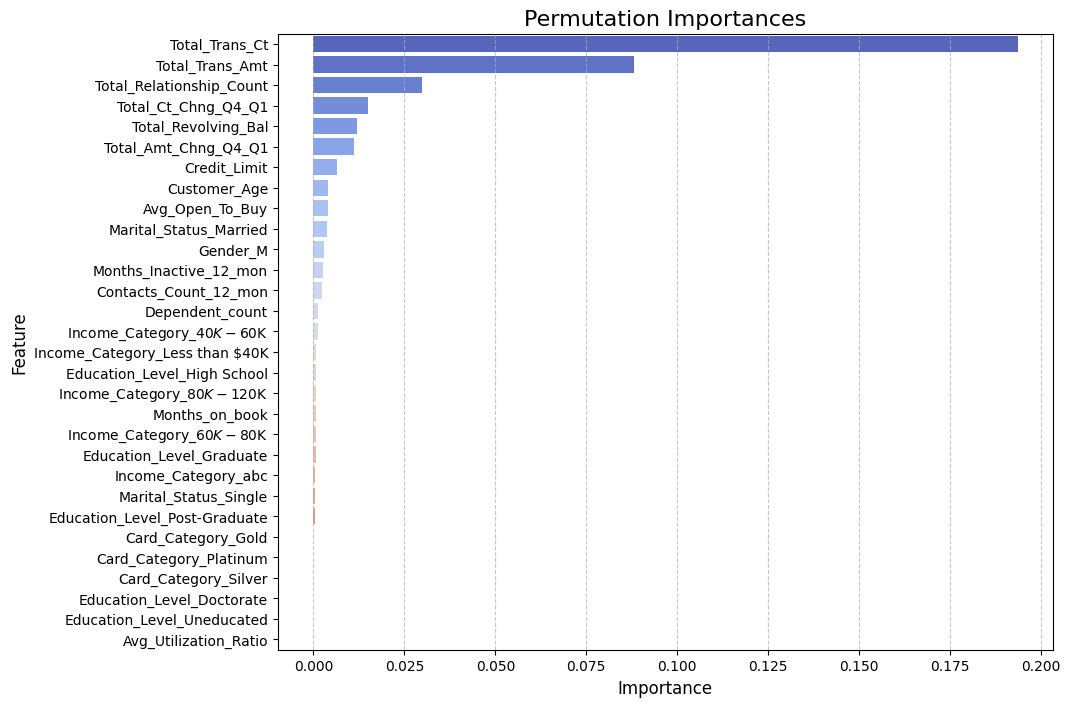

In [52]:
from sklearn.inspection import permutation_importance

# calculate permutation importances
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': result.importances_mean})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Permutation Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Observations Feature Importances:

- **`Total_Trans_Ct` (Total Transaction Count)** is the most important feature, indicating that customer transaction activity strongly correlates with attrition likelihood. Customers with low transaction counts may be disengaged and at higher risk of churn.
- **`Total_Trans_Amt` (Total Transaction Amount)** is the second most influential feature, suggesting that high-value transactions also play a significant role in predicting customer retention.
- **`Total_Relationship_Count`** ranks third, highlighting that customers with more products or services with the bank are less likely to churn.
- Features like **`Credit_Limit`**, **`Avg_Open_To_Buy`**, and **`Total_Revolving_Bal`** have moderate importance, reflecting their influence on customer financial behavior but less so than transactional activity.
- Demographic and categorical variables, such as **`Education_Level`**, **`Income_Category`**, and **`Marital_Status`**, contribute minimally to the model, suggesting that behavioral features are far more predictive of churn than static demographic characteristics.

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Define a function to evaluate the model
def evaluate_model(y_true, y_pred, y_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, pos_label=1), 
        'Recall': recall_score(y_true, y_pred, pos_label=1),
        'F1 Score': f1_score(y_true, y_pred, pos_label=1),
        'AUC': roc_auc_score(y_true, y_proba[:, 1])
    }

# Evaluate models on the test set
model_results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    model_results[model_name] = evaluate_model(y_test, y_pred, y_proba)

# convert the results to a DataFrame
results_df = pd.DataFrame(model_results).T
results_df = results_df.sort_values(by='F1 Score', ascending=False)


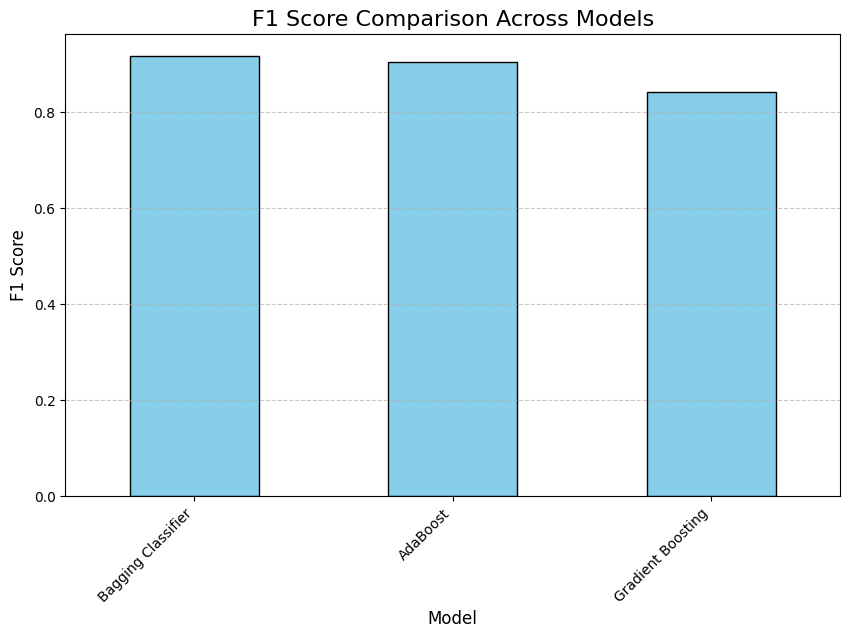

In [54]:
import matplotlib.pyplot as plt

# Plot F1 Score comparison across models
plt.figure(figsize=(10, 6))
results_df['F1 Score'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('F1 Score Comparison Across Models', fontsize=16)
plt.ylabel('F1 Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### **Model Building Insights**

1. **Original Data**:
   - Models trained on the original imbalanced data achieved high accuracy but struggled with recall for the minority class (`Attrited Customer`), highlighting the impact of class imbalance.
   - This imbalance caused the models to favor the majority class, leading to underperformance in identifying potential churners.

2. **Oversampled Data**:
   - Oversampling significantly improved recall, which is crucial for identifying at-risk customers.
   - Both Gradient Boosting and Bagging Classifier demonstrated balanced performance, with Bagging Classifier emerging as a strong candidate due to its higher F1 score and precision.

3. **Undersampled Data**:
   - While undersampling reduced class imbalance, it introduced higher variance due to the smaller training sample size.
   - The models displayed improved recall but experienced declines in accuracy and AUC, making them less reliable overall compared to models trained on oversampled data.

4. **Tuned Models**:
   - Hyperparameter tuning improved all models, with the Bagging Classifier outperforming others across key metrics:
     - **Bagging Classifier** achieved the best F1 score (**91.78%**) and Recall (**94.17%**) on the test set.
     - **AdaBoost** and **Gradient Boosting** also showed strong results but fell slightly short of the Bagging Classifier in precision and overall balance.

---

### **Recommendations**:
1. **Model Selection**:
   - Deploy the **Bagging Classifier** as the final model due to its superior performance across recall, precision, and F1 score, making it the most effective at identifying at-risk customers with minimal trade-offs.

2. **Data Strategy**:
   - Focus on oversampling techniques for future modeling tasks as they provided the best balance between performance metrics without introducing excessive variance or loss of information.

3. **Model Maintenance**:
   - Regularly retrain the Bagging Classifier with updated data to ensure it remains effective as customer behaviors evolve.



# Business Insights and Conclusions

***

---

### **Business Insights and Conclusions**

#### **Key Insights from Analysis**:
1. **Best Model Performance**:
   - The Bagging Classifier is confirmed as the best-performing model, achieving an exceptional F1 score of **91.78%** on the test set. It also demonstrated high **Precision (89.50%)** and **Recall (94.17%)**, making it the most balanced model for identifying at-risk customers.
   - With the highest **Recall**, the model is highly effective at capturing most at-risk customers, minimizing false negatives, and ensuring that fewer potential churners go unnoticed.

2. **Comparison of Tuned Models**:
   - **Gradient Boosting** performed well with an F1 score of **83.57%** but was outperformed in both recall and precision by the Bagging Classifier.
   - **AdaBoost** showed better recall (92.61%) and F1 score (88.79%) than Gradient Boosting, but it still lagged slightly behind Bagging Classifier in terms of precision and overall predictive balance.

3. **Key Predictive Features**:
   - The analysis reaffirmed the significance of key features, including **total transactions, average utilization ratio, and months inactive**, in understanding customer attrition risks.
   - Customers with high utilization ratios or inactivity periods were strong indicators of disengagement, highlighting potential areas for intervention.

---

#### **Business Recommendations**:

**1. Retention Campaigns**:
   - Utilize the high recall capability of the Bagging Classifier to identify at-risk customers. Focus retention strategies on these customers, such as:
     - Personalized offers, incentives, or improved service packages.
     - Proactive outreach to re-engage customers showing signs of disengagement.

   - Prioritize customers with:
     - High average utilization ratios: Offer tailored financial planning assistance or increased credit limits to reduce dissatisfaction.
     - Inactivity over several months: Implement strategies like targeted marketing campaigns or usage-based rewards.

**2. Customer Engagement Improvements**:
   - Focus on customers with low transaction activity or product engagement. Suggestions include:
     - Regular touchpoints such as monthly financial reviews, reward programs, or discounts for increased usage.
     - Promotions that incentivize cross-selling other products, increasing relationship counts.

   - Provide value-added tools (e.g., financial dashboards or usage tips) to customers with high credit utilization, fostering loyalty and satisfaction.

**3. Operational Adjustments**:
   - Introduce loyalty programs for customers with early signs of disengagement (e.g., low contact or product usage rates).
   - Enhance interaction with low-touch customers by scheduling periodic calls or offering incentives for completing certain activities (e.g., enrolling in auto-pay or paperless billing).

**4. Model Deployment**:
   - Integrate the Bagging Classifier into the bank’s operations to periodically score customers for churn risk.
   - Set up an automated pipeline to regularly retrain the model using updated customer data, ensuring the model remains effective as customer behavior evolves.

---

#### **Conclusion**:
By leveraging the superior performance of the Bagging Classifier and acting on these actionable insights, Thera Bank can effectively reduce customer churn and strengthen long-term customer relationships. The bank should prioritize at-risk customers identified by the model and focus on key predictors like transaction counts and utilization ratios. With a proactive retention strategy powered by data-driven insights, Thera Bank can address the decline in credit card usage and secure sustainable growth.

---
